#About:
One of the largest and fastest-growing fully integrated logistic player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

#Problem Statement:
The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields.

• Make sense out of the raw data and help the data science team to build forecasting models on it

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci

In [3]:
df = pd.read_csv('delhivery_data.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
#Shape of the dataset
df.shape

(144867, 24)

In [5]:
#check basic structure of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [6]:
#Brief statistical summary of numerical columns
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [7]:
#Check for null columns
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [8]:
#Null Values in percentage terms
(df.isna().sum()/df.shape[0]) *100

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.202254
destination_center                0.000000
destination_name                  0.180165
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
is_cutoff                         0.000000
cutoff_factor                     0.000000
cutoff_timestamp                  0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
factor                            0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
segment_fac

In [9]:
#unique values in each column
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

#### convert the datatype of the columns to category where number of unique data is 2

In [10]:
df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')
df['is_cutoff '] = df['is_cutoff'].astype('category')

#### Updating the datatype of the datetime columns

In [11]:
datetime_cols = ['trip_creation_time', 'od_start_time', 'od_end_time']
for i in datetime_cols:
    df[i] = pd.to_datetime(df[i])

In [13]:
#check for overall structure after the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [14]:
#checks for source name, if null returns the source center 
missing_source_name = df.loc[df['source_name'].isnull(), 'source_center'].unique()
missing_source_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [15]:
#checks for destination name, if null returns the destination center 
missing_destination_name = df.loc[df['destination_name'].isnull(), 'destination_center'].unique()
missing_destination_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

#### Handling missing destination names and source names

In [16]:
count = 1
for i in missing_destination_name:
    df.loc[df['destination_center'] == i, 'destination_name'] = df.loc[df['destination_center'] == i, 'destination_name'].replace(np.nan, f'location_{count}')
    count += 1

In [17]:
#This dictionary will be used to store unique 'destination_name' values for each 'destination_center' in missing_source_name.
d = {}

#Stores d with unique 'destination_name' values for each 'destination_center' in missing_source_name
for i in missing_source_name:
    d[i] = df.loc[df['destination_center'] == i, 'destination_name'].unique()
    
# Check if the list of unique values is empty for a 'destination_center'    
for key, val in d.items():
    if len(val) == 0:
        d[key] = [f'location_{count}']
        count += 1
        
# Initialize a new dictionary d2 and map 'destination_center' to a single value        
d2 = {}
for key, val in d.items():
    d2[key] = val[0]
    
# print the 'destination_center' and its corresponding key value.
for i, v in d2.items():
    print(i, v)
    


IND342902A1B location_1
IND577116AAA location_2
IND282002AAD location_3
IND465333A1B location_4
IND841301AAC location_5
IND509103AAC location_9
IND126116AAA location_8
IND331022A1B location_14
IND505326AAB location_6
IND852118A1B location_7


In [18]:
# This replaces missing values (np.nan) in the selected 'source_name' column with the 
# corresponding value from the d2 dictionary for the current 'source_center' value i.

for i in missing_source_name:
    df.loc[df['source_center'] == i, 'source_name'] = df.loc[df['source_center'] == i, 'source_name'].replace(np.nan, d2[i])

In [19]:
#check for null values again after changes
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
is_cutoff                         0
dtype: int64

In [20]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867,144867,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000
std,NaN,NaN,NaN,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530


In [21]:
df.describe(include = 'object')

,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144867
unique,1504,14817,1508,1508,1481,1481,93180
top,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-24 05:19:20
freq,1812,101,23347,23347,15192,15192,40


### Merging rows 

In [22]:
grouping_1 = ['trip_uuid', 'source_center', 'destination_center']
df1 = df.groupby(by = grouping_1, as_index = False).agg({'data' : 'first',
                                                         'route_type' : 'first',
                                                       'trip_creation_time' : 'first',
                                                       'source_name' : 'first',
                                                       'destination_name' : 'last',
                                                       'od_start_time' : 'first',
                                                       'od_end_time' : 'first',
                                                       'start_scan_to_end_scan' : 'first',
                                                       'actual_distance_to_destination' : 'last',
                                                       'actual_time' : 'last',
                                                       'osrm_time' : 'last',
                                                       'osrm_distance' : 'last',
                                                       'segment_actual_time' : 'sum',
                                                       'segment_osrm_time' : 'sum',
                                                       'segment_osrm_distance' : 'sum'})
df1

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26366,trip-153861118270144424,IND583119AAA,IND583101AAA,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


In [23]:
### Calculate the time taken between od_start_time and od_end_time

df1['od_total_time'] = df1['od_end_time'] - df1['od_start_time']
#df1.drop(columns = ['od_end_time', 'od_start_time'], inplace = True)
df1['od_total_time'] = df1['od_total_time'].apply(lambda x : round(x.total_seconds() / 60.0, 2))
df1['od_total_time'].head()

0    1260.60
1     999.51
2      58.83
3     122.78
4     834.64
Name: od_total_time, dtype: float64

In [24]:
# merging and aggregration on df1 using groupby
df2 = df1.groupby(by = 'trip_uuid', as_index = False).agg({'source_center' : 'first',
                                                           'destination_center' : 'last',
                                                           'data' : 'first',
                                                           'route_type' : 'first',
                                                           'trip_creation_time' : 'first',
                                                           'source_name' : 'first',
                                                           'destination_name' : 'last',
                                                           'od_total_time' : 'sum',
                                                           'start_scan_to_end_scan' : 'sum',
                                                           'actual_distance_to_destination' : 'sum',
                                                           'actual_time' : 'sum',
                                                           'osrm_time' : 'sum',
                                                           'osrm_distance' : 'sum',
                                                           'segment_actual_time' : 'sum',
                                                           'segment_osrm_time' : 'sum',
                                                           'segment_osrm_distance' : 'sum'})
df2

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,IND160002AAC,IND160002AAC,test,Carting,2018-10-03 23:55:56.258533,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),258.03,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
14813,trip-153861104386292051,IND121004AAB,IND121004AAA,test,Carting,2018-10-03 23:57:23.863155,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),60.59,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14814,trip-153861106442901555,IND208006AAA,IND208006AAA,test,Carting,2018-10-03 23:57:44.429324,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),422.12,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866
14815,trip-153861115439069069,IND627005AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),348.52,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324


In [25]:
## Source Name: Split and extract features out of destination. City-place-code (State)
def extract_state(state):
    e = state.split('(')
    if len(e) == 1:
        return e[0]
    else:
        return e[1].replace(')', "")

In [26]:
def extract_city(city):
    if 'location' in city:
        return 'unknown_city'
    else:
        e = city.split()[0].split('_')
        if 'CCU' in city:
            return 'Kolkata'
        elif 'MAA' in city.upper():
            return 'Chennai'
        elif ('HBR' in city.upper()) or ('BLR' in city.upper()):
            return 'Bengaluru'
        elif 'FBD' in city.upper():
            return 'Faridabad'
        elif 'BOM' in city.upper():
            return 'Mumbai'
        elif 'DEL' in city.upper():
            return 'Delhi'
        elif 'OK' in city.upper():
            return 'Delhi'
        elif 'GZB' in city.upper():
            return 'Ghaziabad'
        elif 'GGN' in city.upper():
            return 'Gurgaon'
        elif 'AMD' in city.upper():
            return 'Ahmedabad'
        elif 'CJB' in city.upper():
            return 'Coimbatore'
        elif 'HYD' in city.upper():
            return 'Hyderabad'
        return e[0]

In [27]:
def extract_place(place):
    if 'location' in place:
        return place
    elif 'HBR' in place:
        return 'HBR Layout PC'
    else:
        e = place.split()[0].split('_', 1)
        if len(e) == 1:
            return 'unknown_place'
        else:
            return e[1]

In [28]:
df2['source_state'] = df2['source_name'].apply(extract_state)
df2['source_state'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Assam', 'Madhya Pradesh', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Goa', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Uttarakhand', 'Himachal Pradesh', 'Kerala',
       'Arunachal Pradesh', 'Bihar', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Jammu & Kashmir', 'Mizoram', 'Nagaland',
       'location_9', 'location_3', 'location_2', 'location_14',
       'location_7'], dtype=object)

In [29]:
df2['source_city'] = df2['source_name'].apply(extract_city)
df2['source_city'].unique()[:20]

array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Bellary', 'Chennai',
       'Bengaluru', 'Surat', 'Delhi', 'Pune', 'Faridabad', 'Shirala',
       'Hyderabad', 'Thirumalagiri', 'Gulbarga', 'Jaipur', 'Allahabad',
       'Guwahati', 'Narsinghpur', 'Shrirampur'], dtype=object)

In [30]:
df2['source_place'] = df2['source_name'].apply(extract_place)
df2['source_place'].unique()[:20]

array(['Central_H_6', 'ChikaDPP_D', 'Bilaspur_HB', 'unknown_place', 'Dc',
       'Poonamallee', 'Chrompet_DPC', 'HBR Layout PC', 'Central_D_12',
       'Lajpat_IP', 'North_D_3', 'Balabhgarh_DPC', 'Central_DPP_3',
       'Shamshbd_H', 'Xroad_D', 'Nehrugnj_I', 'Central_I_7',
       'Central_H_1', 'Nangli_IP', 'North'], dtype=object)

In [31]:
##Destination Name: Split and extract features out of destination. City-place-code (State)

df2['destination_state'] = df2['destination_name'].apply(extract_state)
df2['destination_state'].head()

0    Uttar Pradesh
1        Karnataka
2          Haryana
3      Maharashtra
4        Karnataka
Name: destination_state, dtype: object

In [32]:
df2['destination_city'] = df2['destination_name'].apply(extract_city)
df2['destination_city'].head()

0        Kanpur
1    Doddablpur
2       Gurgaon
3        Mumbai
4        Sandur
Name: destination_city, dtype: object

In [33]:
df2['destination_place'] = df2['destination_name'].apply(extract_place)
df2['destination_place'].head()

0    Central_H_6
1     ChikaDPP_D
2    Bilaspur_HB
3      MiraRd_IP
4     WrdN1DPP_D
Name: destination_place, dtype: object

In [34]:
##Extract month, year, day, week, hour from Trip_creation_time 

df2['trip_creation_date'] = pd.to_datetime(df2['trip_creation_time'].dt.date)
df2['trip_creation_date'].head()

0   2018-09-12
1   2018-09-12
2   2018-09-12
3   2018-09-12
4   2018-09-12
Name: trip_creation_date, dtype: datetime64[ns]

In [35]:
df2['trip_creation_day'] = df2['trip_creation_time'].dt.day
df2['trip_creation_day'] = df2['trip_creation_day'].astype('int8')
df2['trip_creation_day'].head()

0    12
1    12
2    12
3    12
4    12
Name: trip_creation_day, dtype: int8

In [36]:
df2['trip_creation_month'] = df2['trip_creation_time'].dt.month
df2['trip_creation_month'] = df2['trip_creation_month'].astype('int8')
df2['trip_creation_month'].head()

0    9
1    9
2    9
3    9
4    9
Name: trip_creation_month, dtype: int8

In [37]:
df2['trip_creation_year'] = df2['trip_creation_time'].dt.year
df2['trip_creation_year'] = df2['trip_creation_year'].astype('int16')
df2['trip_creation_year'].head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: trip_creation_year, dtype: int16

In [38]:
df2['trip_creation_week'] = df2['trip_creation_time'].dt.isocalendar().week
df2['trip_creation_week'] = df2['trip_creation_week'].astype('int8')
df2['trip_creation_week'].head()

0    37
1    37
2    37
3    37
4    37
Name: trip_creation_week, dtype: int8

In [39]:
df2['trip_creation_hour'] = df2['trip_creation_time'].dt.hour
df2['trip_creation_hour'] = df2['trip_creation_hour'].astype('int8')
df2['trip_creation_hour'].head()

0    0
1    0
2    0
3    0
4    0
Name: trip_creation_hour, dtype: int8

In [40]:
# structure of dataset after data cleaning 
df2.shape

(14817, 29)

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   source_center                   14817 non-null  object        
 2   destination_center              14817 non-null  object        
 3   data                            14817 non-null  category      
 4   route_type                      14817 non-null  category      
 5   trip_creation_time              14817 non-null  datetime64[ns]
 6   source_name                     14817 non-null  object        
 7   destination_name                14817 non-null  object        
 8   od_total_time                   14817 non-null  float64       
 9   start_scan_to_end_scan          14817 non-null  float64       
 10  actual_distance_to_destination  14817 non-null  float64       
 11  ac

In [42]:
df2.head()

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,...,source_place,destination_state,destination_city,destination_place,trip_creation_date,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_week,trip_creation_hour
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,...,Central_H_6,Uttar Pradesh,Kanpur,Central_H_6,2018-09-12,12,9,2018,37,0
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,...,ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP_D,2018-09-12,12,9,2018,37,0
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,...,Bilaspur_HB,Haryana,Gurgaon,Bilaspur_HB,2018-09-12,12,9,2018,37,0
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,...,unknown_place,Maharashtra,Mumbai,MiraRd_IP,2018-09-12,12,9,2018,37,0
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,...,Dc,Karnataka,Sandur,WrdN1DPP_D,2018-09-12,12,9,2018,37,0


In [43]:
df2.describe()

,trip_creation_time,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_date,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_week,trip_creation_hour
count,14817,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817,14817.000000,14817.000000,14817.0,14817.000000,14817.000000
mean,2018-09-22 12:44:19.555167744,531.697630,530.810016,164.477838,357.143754,161.384018,204.344689,353.892286,180.949787,223.201161,2018-09-21 23:46:58.627252736,18.370790,9.120672,2018.0,38.295944,12.449821
min,2018-09-12 00:00:16.535741,23.460000,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,2018-09-12 00:00:00,1.000000,9.000000,2018.0,37.000000,0.000000
25%,2018-09-17 02:51:25.129125888,149.930000,149.000000,22.837239,67.000000,29.000000,30.819200,66.000000,31.000000,32.654500,2018-09-17 00:00:00,14.000000,9.000000,2018.0,38.000000,4.000000
50%,2018-09-22 04:02:35.066945024,280.770000,280.000000,48.474072,149.000000,60.000000,65.618800,147.000000,65.000000,70.154400,2018-09-22 00:00:00,19.000000,9.000000,2018.0,38.000000,14.000000
75%,2018-09-27 19:37:41.898427904,638.200000,637.000000,164.583208,370.000000,168.000000,208.475000,367.000000,185.000000,218.802400,2018-09-27 00:00:00,25.000000,9.000000,2018.0,39.000000,20.000000
max,2018-10-03 23:59:42.701692,7898.550000,7898.000000,2186.531787,6265.000000,2032.000000,2840.081000,6230.000000,2564.000000,3523.632400,2018-10-03 00:00:00,30.000000,10.000000,2018.0,40.000000,23.000000
std,NaN,658.868223,658.705957,305.388147,561.396157,271.360995,370.395573,556.247965,314.542047,416.628374,NaN,7.893275,0.325757,0.0,0.967872,7.986553


In [119]:
# statistical summary of all object dtype 

df2.describe(include = object).T

,count,unique,top,freq
trip_uuid,14817,14817,trip-153671041653548748,1
source_center,14817,938,IND000000ACB,1063
destination_center,14817,1042,IND000000ACB,821
source_name,14817,938,Gurgaon_Bilaspur_HB (Haryana),1063
destination_name,14817,1042,Gurgaon_Bilaspur_HB (Haryana),821
source_state,14817,34,Maharashtra,2714
source_city,14817,690,Mumbai,1442
source_place,14817,761,Bilaspur_HB,1063
destination_state,14817,39,Maharashtra,2561
destination_city,14817,806,Mumbai,1548


In [44]:
# check from where most orders are coming from

df_source_state = df2.groupby(by = 'source_state')['trip_uuid'].count().to_frame().reset_index()
df_source_state['perc'] = np.round(df_source_state['trip_uuid'] * 100/ df_source_state['trip_uuid'].sum(), 2)
df_source_state = df_source_state.sort_values(by = 'trip_uuid', ascending = False)
df_source_state.head()

,source_state,trip_uuid,perc
17,Maharashtra,2714,18.32
14,Karnataka,2143,14.46
10,Haryana,1838,12.40
24,Tamil Nadu,1039,7.01
25,Telangana,781,5.27


[]

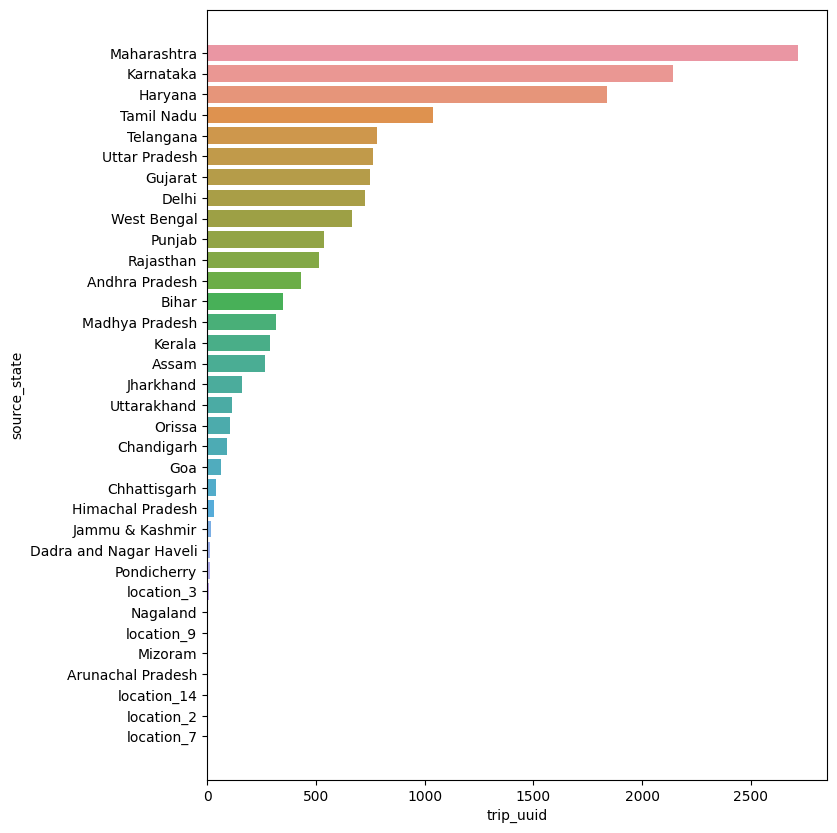

In [45]:
plt.figure(figsize = (8, 10))
sns.barplot(data = df_source_state, 
            x = df_source_state['trip_uuid'], 
            y = df_source_state['source_state'])
plt.plot()

In [46]:
#  based on the number of trips ended in different cities

df_destination_city = df2.groupby(by = 'destination_city')['trip_uuid'].count().to_frame().reset_index()
df_destination_city['perc'] = np.round(df_destination_city['trip_uuid'] * 100/ df_destination_city['trip_uuid'].sum(), 2)
df_destination_city = df_destination_city.sort_values(by = 'trip_uuid', ascending = False)[:30]
df_destination_city

,destination_city,trip_uuid,perc
515,Mumbai,1548,10.45
96,Bengaluru,975,6.58
282,Gurgaon,936,6.32
200,Delhi,778,5.25
163,Chennai,595,4.02
72,Bangalore,551,3.72
308,Hyderabad,503,3.39
115,Bhiwandi,434,2.93
418,Kolkata,384,2.59
158,Chandigarh,339,2.29


#### Compare the difference between od_total_time and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

Set up Null Hypothesis

Null Hypothesis (H0) - od_total_time and start_scan_to_end_scan are same.
Alternate Hypothesis (HA) - od_total_time and start_scan_to_end_scan are different.

In [48]:
df2[['od_total_time', 'start_scan_to_end_scan']].describe()

,od_total_time,start_scan_to_end_scan
count,14817.000000,14817.000000
mean,531.697630,530.810016
std,658.868223,658.705957
min,23.460000,23.000000
25%,149.930000,149.000000
50%,280.770000,280.000000
75%,638.200000,637.000000
max,7898.550000,7898.000000


[]

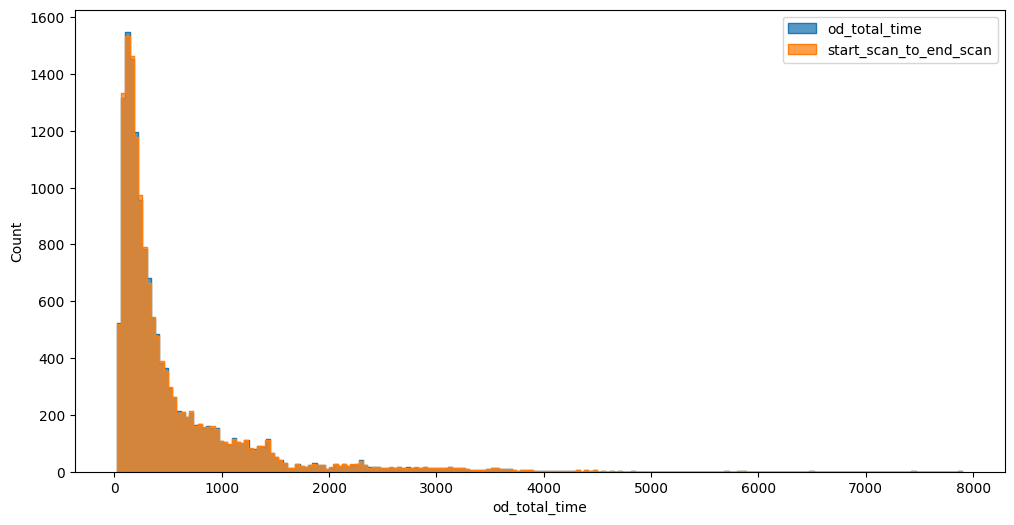

In [49]:
plt.figure(figsize = (12, 6))
sns.histplot(df2['od_total_time'], element = 'step')
sns.histplot(df2['start_scan_to_end_scan'], element = 'step')
plt.legend(['od_total_time', 'start_scan_to_end_scan'])
plt.plot()

[]

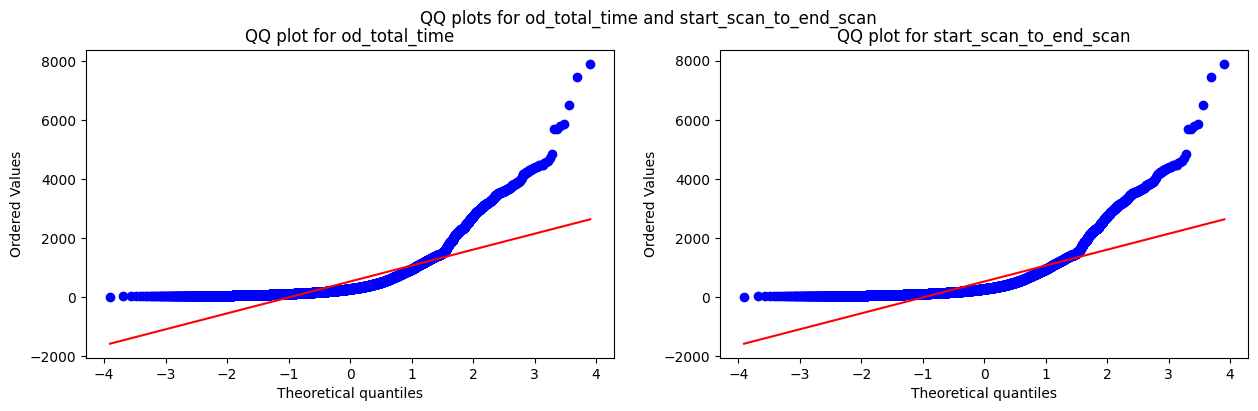

In [50]:
#  check for normal distribution using QQ Plot

plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for od_total_time and start_scan_to_end_scan')
sci.probplot(df2['od_total_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for od_total_time')
plt.subplot(1, 2, 2)
sci.probplot(df2['start_scan_to_end_scan'], plot = plt, dist = 'norm')
plt.title('QQ plot for start_scan_to_end_scan')
plt.plot()

In [53]:
# It can be seen from the above plots that the samples follow normal distribution.
# since the plot is not normally distributed ANOVA cannot be performed hence applying Shapiro-Wilk test for normality
# Ho : The sample follows normal distribution  
# Ha : The sample does not follow normal distribution
# alpha = 0.05

test_stat, p_value = sci.shapiro(df2['od_total_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Fail to reject null hypothesis')


p-value 0.0
Reject Null Hypothesis


In [54]:
test_stat, p_value = sci.shapiro(df2['start_scan_to_end_scan'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Fail to reject null hypothesis')

p-value 0.0
Reject Null Hypothesis


In [55]:
# Null Hypothesis(H0) - Variances are equal
# Alternate Hypothesis(HA) - Variances are not equal
# alpha = 0.05

test_stat, p_value = sci.levene(df2['od_total_time'], df2['start_scan_to_end_scan'])
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis. Variances are not equal')
else:
    print('Fail to reject null hypothesis. Variances are equal')

p-value 0.9668007217581142
Fail to reject null hypothesis. Variances are equal


In [56]:
# Since the samples do not follow any of the assumptions, T-Test cannot be applied here. 
# We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

test_stat, p_value = sci.mannwhitneyu(df2['od_total_time'], df2['start_scan_to_end_scan'])
print('P-value :',p_value)


P-value : 0.7815123224221716


#### Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [57]:
df2[['actual_time', 'osrm_time']].describe()

,actual_time,osrm_time
count,14817.000000,14817.000000
mean,357.143754,161.384018
std,561.396157,271.360995
min,9.000000,6.000000
25%,67.000000,29.000000
50%,149.000000,60.000000
75%,370.000000,168.000000
max,6265.000000,2032.000000


[]

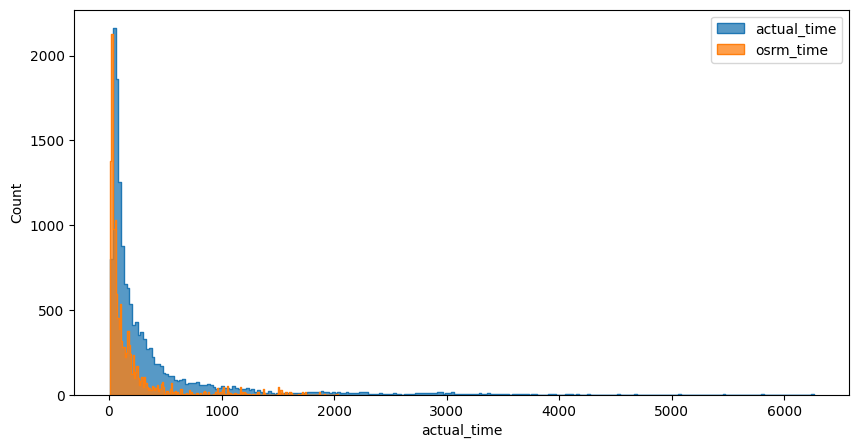

In [58]:
plt.figure(figsize = (10, 5))
sns.histplot(df2['actual_time'], element = 'step')
sns.histplot(df2['osrm_time'], element = 'step')
plt.legend(['actual_time', 'osrm_time'])
plt.plot()

[]

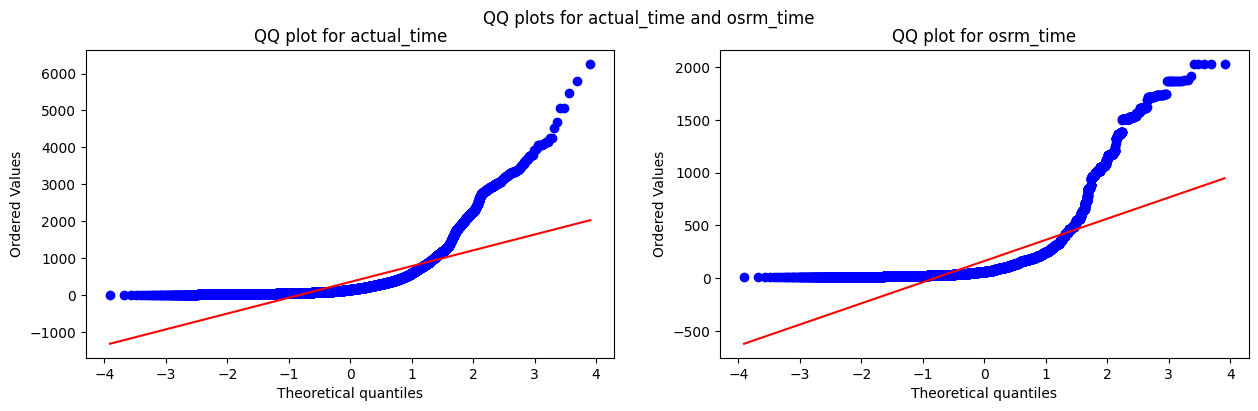

In [59]:
#  check for normal distribution using QQ Plot

plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and osrm_time')
sci.probplot(df2['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
sci.probplot(df2['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.plot()

In [60]:
# It can be seen from the above plots that the samples follow normal distribution.
# Applying Shapiro-Wilk test for normality
# Ho : The sample follows normal distribution  
# Ha : The sample does not follow normal distribution
# alpha = 0.05

test_stat, p_value = sci.shapiro(df2['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Fail to reject null hypothesis')



p-value 0.0
Reject Null Hypothesis


In [61]:
test_stat, p_value = sci.shapiro(df2['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Fail to reject null hypothesis')
 

p-value 0.0
Reject Null Hypothesis


In [62]:
# Null Hypothesis(H0) - Variances are equal
# Alternate Hypothesis(HA) - Variances are not equal
# alpha = 0.05

test_stat, p_value = sci.levene(df2['actual_time'], df2['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis. Variances are not equal')
else:
    print('Fail to reject null hypothesis. Variances are equal')


p-value 1.871297993683208e-220
Reject Null Hypothesis. Variances are not equal


In [63]:
# Since the samples do not follow any of the assumptions, T-Test cannot be applied here. 
# We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

test_stat, p_value = sci.mannwhitneyu(df2['actual_time'], df2['osrm_time'])
print('p-value', p_value)


p-value 0.0


#### Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)


In [64]:
df2[['actual_time', 'segment_actual_time']].describe()

,actual_time,segment_actual_time
count,14817.000000,14817.000000
mean,357.143754,353.892286
std,561.396157,556.247965
min,9.000000,9.000000
25%,67.000000,66.000000
50%,149.000000,147.000000
75%,370.000000,367.000000
max,6265.000000,6230.000000


[]

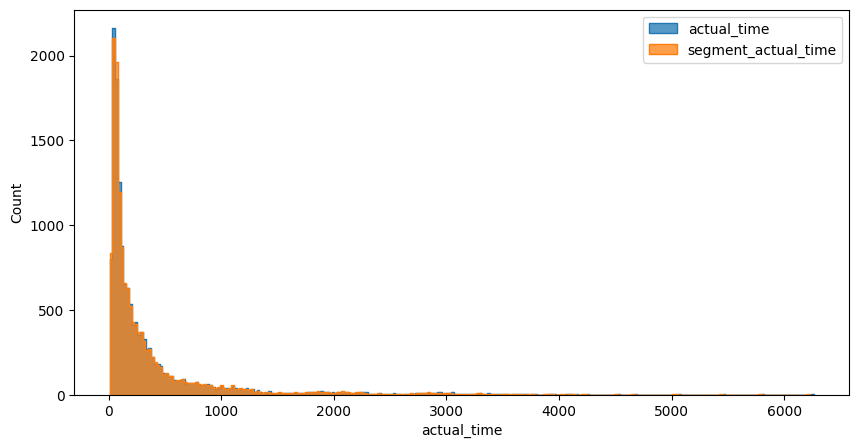

In [65]:
plt.figure(figsize = (10, 5))
sns.histplot(df2['actual_time'], element = 'step')
sns.histplot(df2['segment_actual_time'], element = 'step')
plt.legend(['actual_time', 'segment_actual_time'])
plt.plot()

[]

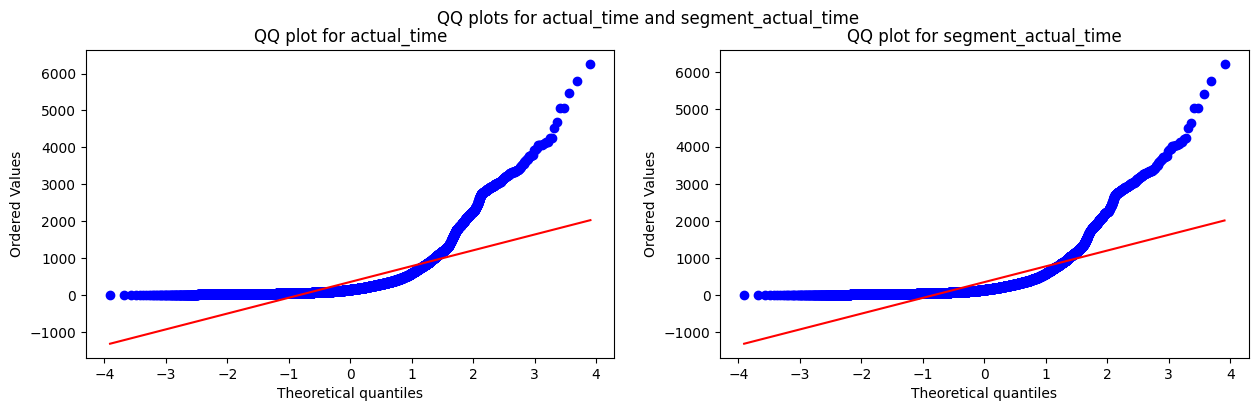

In [66]:
#  check for normal distribution using QQ Plot

plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and segment_actual_time')
sci.probplot(df2['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
sci.probplot(df2['segment_actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_actual_time')
plt.plot()

In [67]:
# It can be seen from the above plots that the samples follow normal distribution.
# Applying Shapiro-Wilk test for normality
# Ho : The sample follows normal distribution  
# Ha : The sample does not follow normal distribution
# alpha = 0.05

test_stat, p_value = sci.shapiro(df2['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Fail to reject null hypothesis')


p-value 0.0
Reject Null Hypothesis


In [68]:
test_stat, p_value = sci.shapiro(df2['segment_actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Fail to reject null hypothesis')


p-value 0.0
Reject Null Hypothesis


In [69]:
# Null Hypothesis(H0) - Variances are equal
# Alternate Hypothesis(HA) - Variances are not equal
# alpha = 0.05

test_stat, p_value = sci.levene(df2['actual_time'], df2['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis. Variances are not equal')
else:
    print('Fail to reject null hypothesis. Variances are equal')


p-value 0.6955022668700895
Fail to reject null hypothesis. Variances are equal


In [70]:
# Since the samples do not follow any of the assumptions, T-Test cannot be applied here. 
# We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

test_stat, p_value = sci.mannwhitneyu(df2['actual_time'], df2['segment_actual_time'])
print('p-value', p_value)

p-value 0.4164235159622476


#### Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [71]:
df2[['osrm_distance', 'segment_osrm_distance']].describe()

,osrm_distance,segment_osrm_distance
count,14817.000000,14817.000000
mean,204.344689,223.201161
std,370.395573,416.628374
min,9.072900,9.072900
25%,30.819200,32.654500
50%,65.618800,70.154400
75%,208.475000,218.802400
max,2840.081000,3523.632400


[]

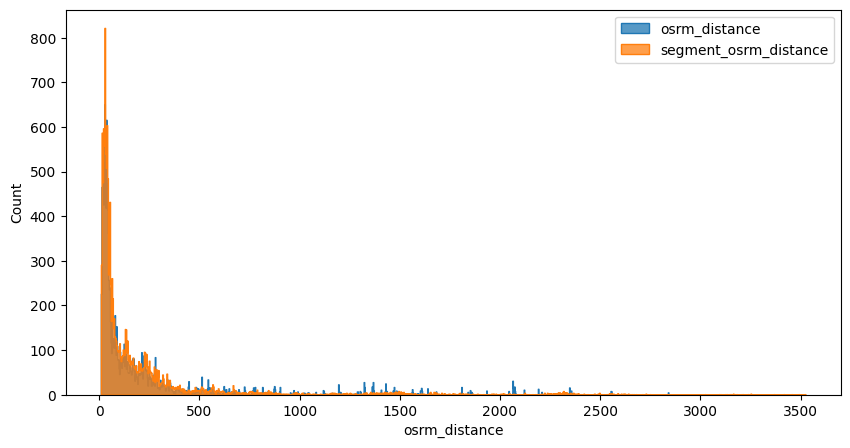

In [72]:
plt.figure(figsize = (10, 5))
sns.histplot(df2['osrm_distance'], element = 'step', bins = 1000)
sns.histplot(df2['segment_osrm_distance'], element = 'step', bins = 1000)
plt.legend(['osrm_distance', 'segment_osrm_distance'])
plt.plot()

[]

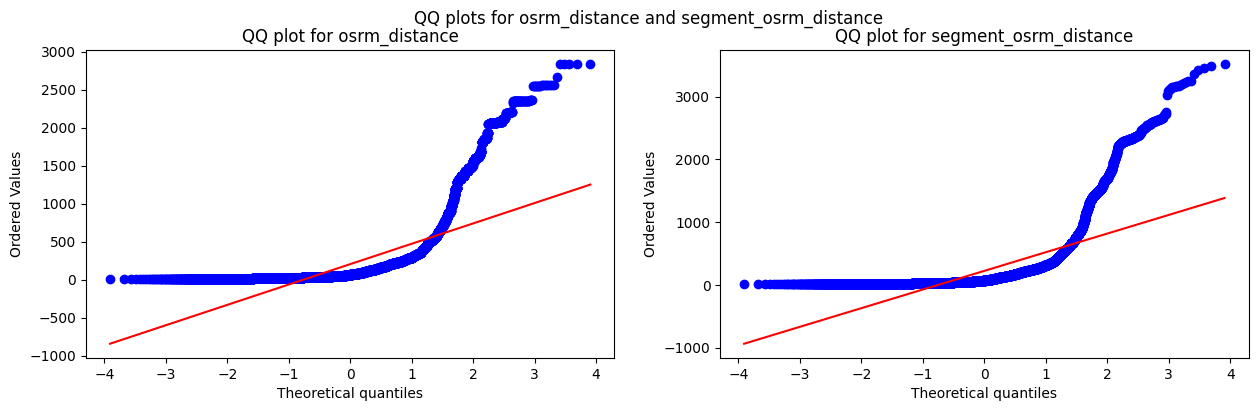

In [73]:
#  check for normal distribution using QQ Plot

plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_distance and segment_osrm_distance')
sci.probplot(df2['osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_distance')
plt.subplot(1, 2, 2)
sci.probplot(df2['segment_osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_distance')
plt.plot()

In [74]:
# It can be seen from the above plots that the samples follow normal distribution.
# Applying Shapiro-Wilk test for normality
# Ho : The sample follows normal distribution  
# Ha : The sample does not follow normal distribution
# alpha = 0.05

test_stat, p_value = sci.shapiro(df2['osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Fail to reject null hypothesis')


p-value 0.0
Reject Null Hypothesis


In [75]:
test_stat, p_value = sci.shapiro(df2['segment_osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Fail to reject null hypothesis')

p-value 0.0
Reject Null Hypothesis


In [76]:
# Null Hypothesis(H0) - Variances are equal
# Alternate Hypothesis(HA) - Variances are not equal
# alpha = 0.05

test_stat, p_value = sci.levene(df2['osrm_distance'], df2['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis. Variances are not equal')
else:
    print('Fail to reject null hypothesis. Variances are equal')


p-value 0.00020976354422600578
Reject Null Hypothesis. Variances are not equal


In [77]:
# Since the samples do not follow any of the assumptions, T-Test cannot be applied here. 
# We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

test_stat, p_value = sci.mannwhitneyu(df2['osrm_distance'], df2['segment_osrm_distance'])
print('p-value', p_value)


p-value 9.511383588276373e-07


#### Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)





In [78]:
df2[['osrm_time', 'segment_osrm_time']].describe()

,osrm_time,segment_osrm_time
count,14817.000000,14817.000000
mean,161.384018,180.949787
std,271.360995,314.542047
min,6.000000,6.000000
25%,29.000000,31.000000
50%,60.000000,65.000000
75%,168.000000,185.000000
max,2032.000000,2564.000000


[]

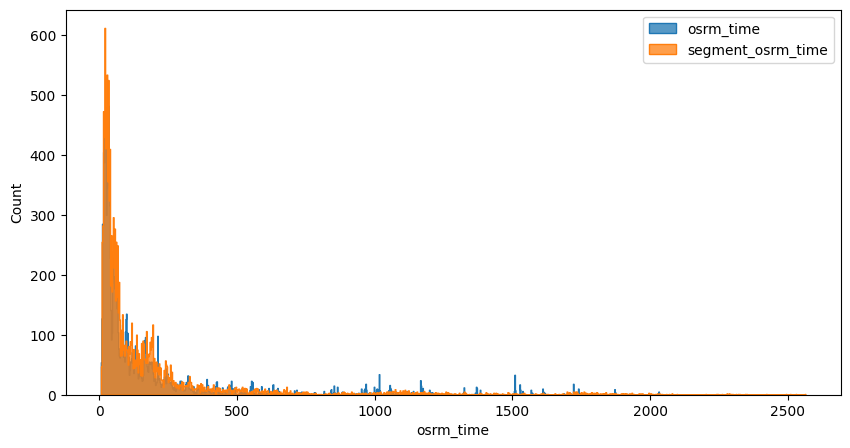

In [79]:
plt.figure(figsize = (10, 5))
sns.histplot(df2['osrm_time'], element = 'step', bins = 1000)
sns.histplot(df2['segment_osrm_time'], element = 'step', bins = 1000)
plt.legend(['osrm_time', 'segment_osrm_time'])
plt.plot()

[]

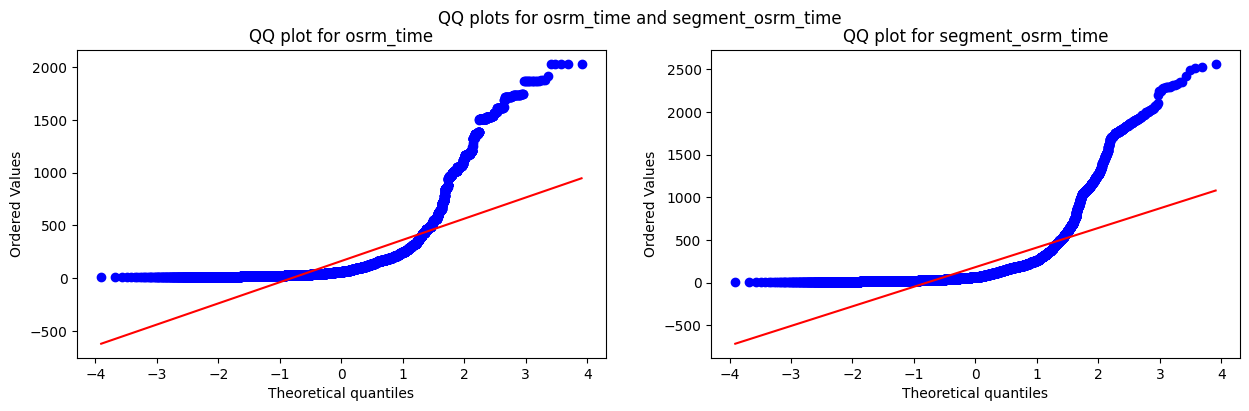

In [80]:
#  check for normal distribution using QQ Plot

plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_time and segment_osrm_time')
sci.probplot(df2['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.subplot(1, 2, 2)
sci.probplot(df2['segment_osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_time')
plt.plot()

In [81]:
# It can be seen from the above plots that the samples follow normal distribution.
# Applying Shapiro-Wilk test for normality
# Ho : The sample follows normal distribution  
# Ha : The sample does not follow normal distribution
# alpha = 0.05

test_stat, p_value = sci.shapiro(df2['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Fail to reject null hypothesis')  

p-value 0.0
Reject Null Hypothesis


In [82]:
test_stat, p_value = sci.shapiro(df2['segment_osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Fail to reject null hypothesis') 

p-value 0.0
Reject Null Hypothesis


In [83]:
# Null Hypothesis(H0) - Variances are equal
# Alternate Hypothesis(HA) - Variances are not equal
# alpha = 0.05

test_stat, p_value = sci.levene(df2['osrm_time'], df2['segment_osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis. Variances are not equal')
else:
    print('Fail to reject null hypothesis. Variances are equal')

p-value 8.349482669010088e-08
Reject Null Hypothesis. Variances are not equal


In [84]:
# Since the samples do not follow any of the assumptions, T-Test cannot be applied here. 
# We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

test_stat, p_value = sci.mannwhitneyu(df2['osrm_time'], df2['segment_osrm_time'])
print('p-value', p_value)

# Since p-value < alpha therfore it can be concluded that osrm_time and segment_osrm_time are not similar.

p-value 2.2995370859748865e-08


#### Find outliers in the numerical variables

In [85]:

numerical_columns = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
df2[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
od_total_time,14817.0,531.697630,658.868223,23.460000,149.930000,280.770000,638.200000,7898.550000
start_scan_to_end_scan,14817.0,530.810016,658.705957,23.000000,149.000000,280.000000,637.000000,7898.000000
actual_distance_to_destination,14817.0,164.477838,305.388147,9.002461,22.837239,48.474072,164.583208,2186.531787
actual_time,14817.0,357.143754,561.396157,9.000000,67.000000,149.000000,370.000000,6265.000000
osrm_time,14817.0,161.384018,271.360995,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14817.0,204.344689,370.395573,9.072900,30.819200,65.618800,208.475000,2840.081000
segment_actual_time,14817.0,353.892286,556.247965,9.000000,66.000000,147.000000,367.000000,6230.000000
segment_osrm_time,14817.0,180.949787,314.542047,6.000000,31.000000,65.000000,185.000000,2564.000000
segment_osrm_distance,14817.0,223.201161,416.628374,9.072900,32.654500,70.154400,218.802400,3523.632400


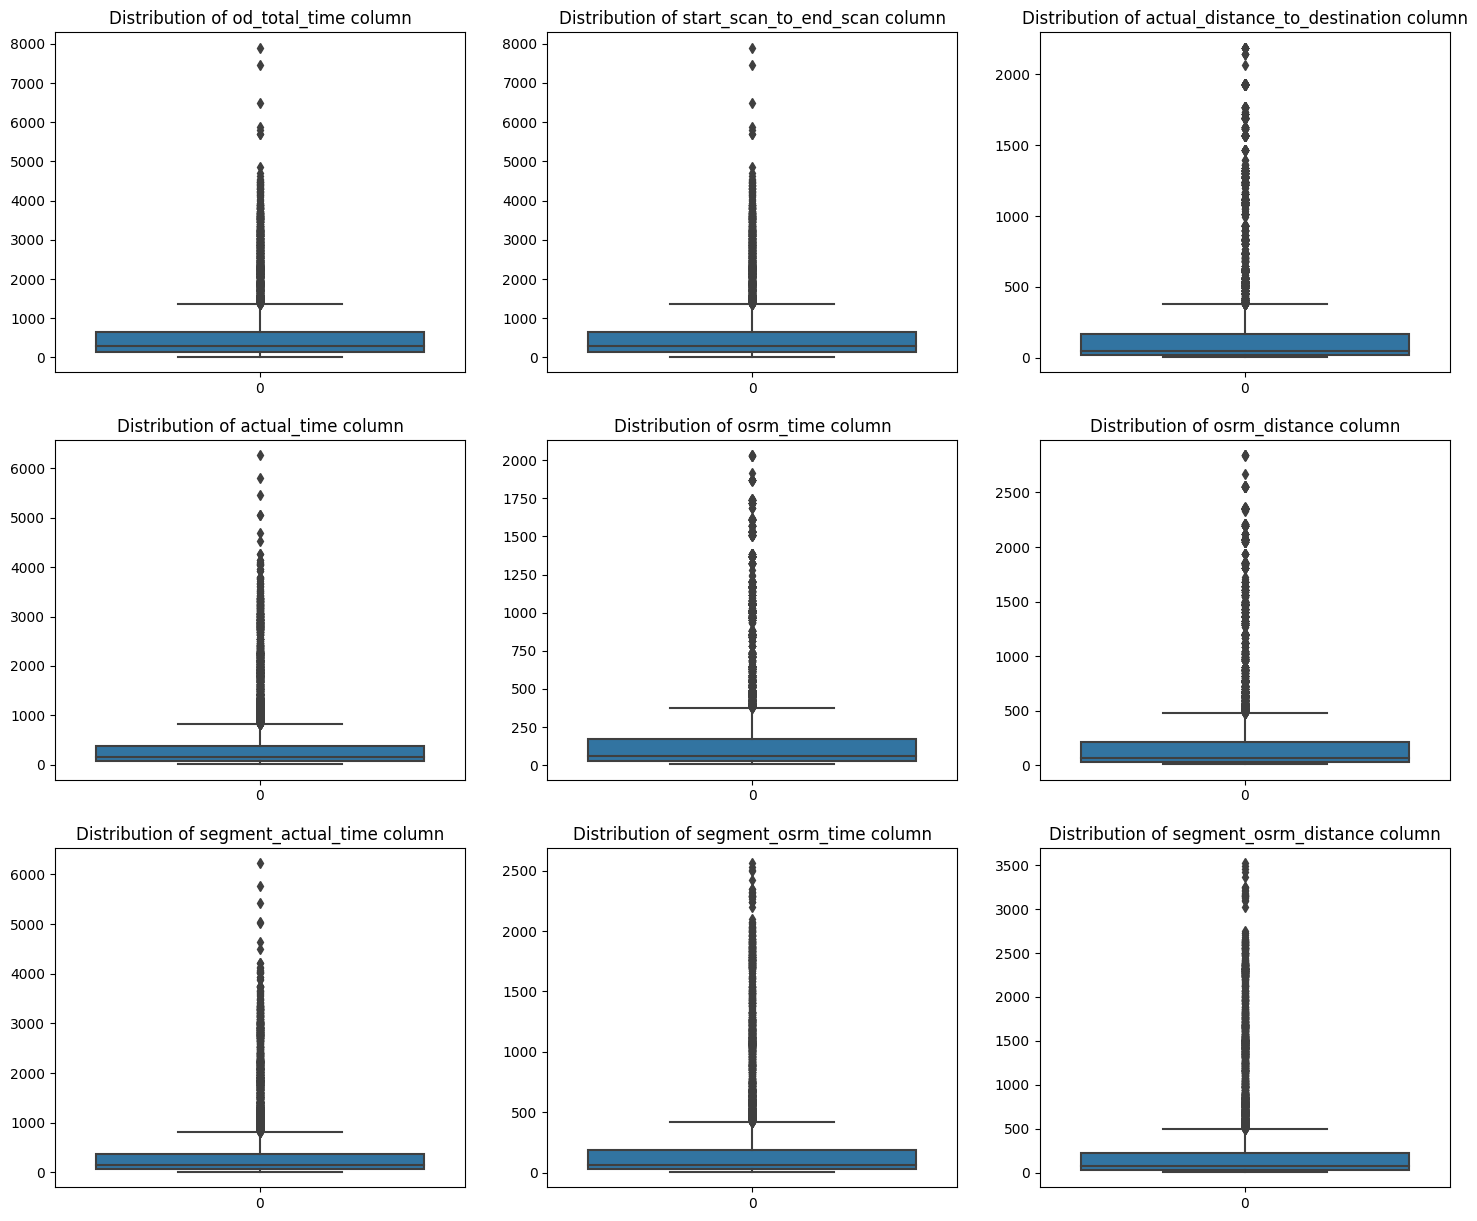

In [86]:
plt.figure(figsize = (18, 15))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(df2[numerical_columns[i]])
    plt.title(f"Distribution of {numerical_columns[i]} column")
    plt.plot()

In [90]:
# Detecting Outliers

for i in numerical_columns:
    Q1 = np.quantile(df2[i], 0.25)
    Q3 = np.quantile(df2[i], 0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    outliers = df2.loc[(df2[i] < LB) | (df2[i] > UB)]
    print(i)
    print('---------------')
    print(f'Q1 : {Q1}')
    print(f'Q3 : {Q3}')
    print(f'IQR : {IQR}')
    print(f'LB : {LB}')
    print(f'UB : {UB}')
    print(f'Number of outliers : {outliers.shape[0]}')
    print()

od_total_time
---------------
Q1 : 149.93
Q3 : 638.2
IQR : 488.27000000000004
LB : -582.4750000000001
UB : 1370.605
Number of outliers : 1266

start_scan_to_end_scan
---------------
Q1 : 149.0
Q3 : 637.0
IQR : 488.0
LB : -583.0
UB : 1369.0
Number of outliers : 1267

actual_distance_to_destination
---------------
Q1 : 22.83723905859321
Q3 : 164.58320763841138
IQR : 141.74596857981817
LB : -189.78171381113404
UB : 377.2021605081386
Number of outliers : 1449

actual_time
---------------
Q1 : 67.0
Q3 : 370.0
IQR : 303.0
LB : -387.5
UB : 824.5
Number of outliers : 1643

osrm_time
---------------
Q1 : 29.0
Q3 : 168.0
IQR : 139.0
LB : -179.5
UB : 376.5
Number of outliers : 1517

osrm_distance
---------------
Q1 : 30.8192
Q3 : 208.475
IQR : 177.6558
LB : -235.6645
UB : 474.9587
Number of outliers : 1524

segment_actual_time
---------------
Q1 : 66.0
Q3 : 367.0
IQR : 301.0
LB : -385.5
UB : 818.5
Number of outliers : 1643

segment_osrm_time
---------------
Q1 : 31.0
Q3 : 185.0
IQR : 154.0
LB : -

### one-hot encoding of categorical variables

In [91]:
# value counts before one-hot encoding

df2['route_type'].value_counts()

route_type
Carting    8908
FTL        5909
Name: count, dtype: int64

In [92]:
# one-hot encoding on categorical column route type

from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()
df2['route_type'] = label_encoder.fit_transform(df2['route_type'])

In [93]:
# value counts after one-hot encoding

df2['route_type'].value_counts()

route_type
0    8908
1    5909
Name: count, dtype: int64

In [94]:
# value counts of categorical variable 'data' before one-hot encoding

df2['data'].value_counts()

data
training    10654
test         4163
Name: count, dtype: int64

In [95]:
# one-hot encoding on categorical variable 'data'

label_encoder = LabelEncoder()
df2['data'] = label_encoder.fit_transform(df2['data'])

In [96]:
#value counts after one-hot encoding

df2['data'].value_counts()

data
1    10654
0     4163
Name: count, dtype: int64

### Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler



In [97]:
from sklearn.preprocessing import MinMaxScaler

[]

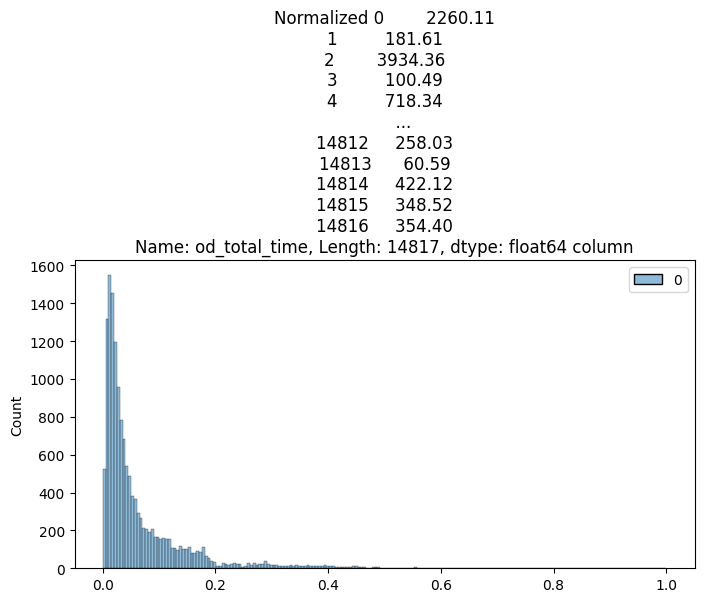

In [98]:
plt.figure(figsize = (8, 4))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['od_total_time']} column")
plt.plot()

[]

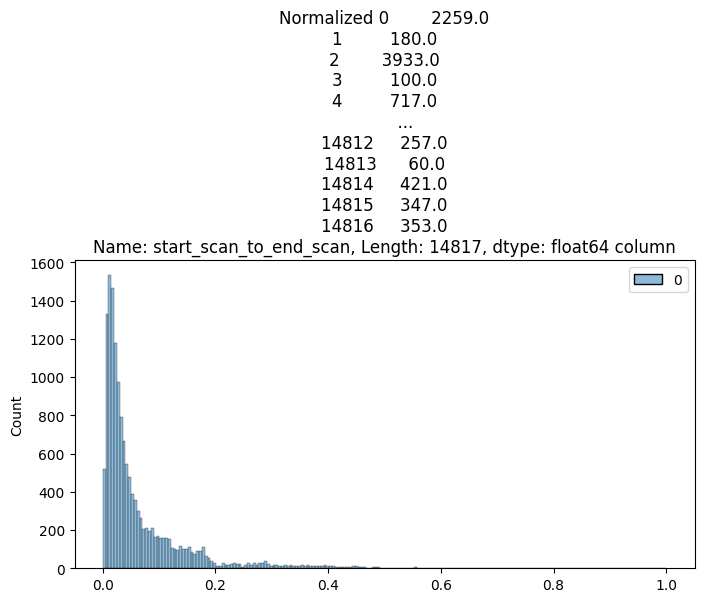

In [99]:
plt.figure(figsize = (8, 4))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['start_scan_to_end_scan']} column")
plt.plot()

[]

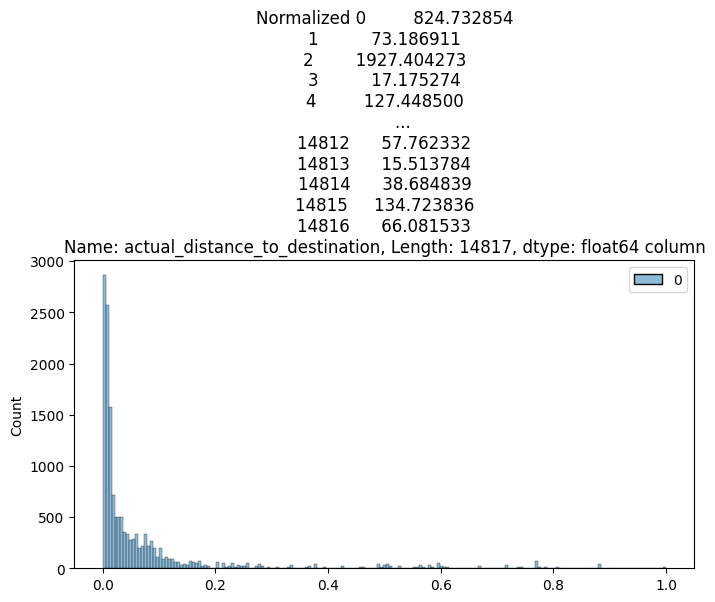

In [100]:
plt.figure(figsize = (8, 4))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['actual_distance_to_destination'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['actual_distance_to_destination']} column")
plt.plot()

[]

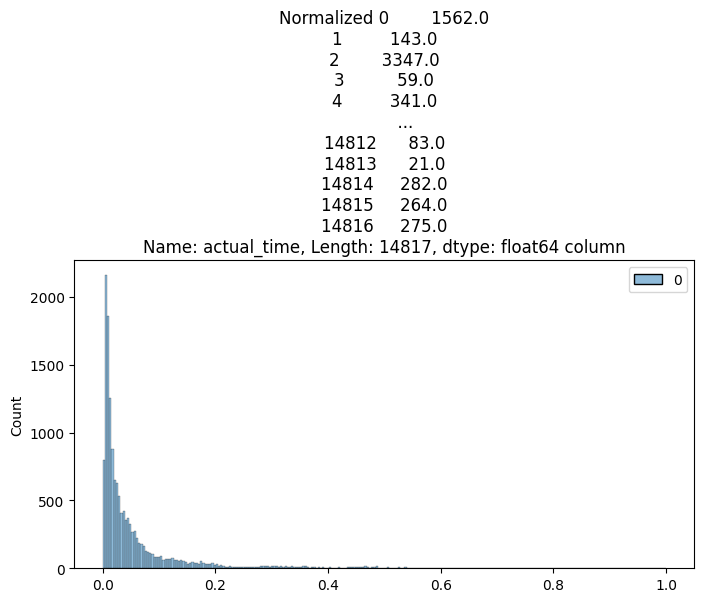

In [101]:
plt.figure(figsize = (8, 4))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['actual_time']} column")
plt.plot()

[]

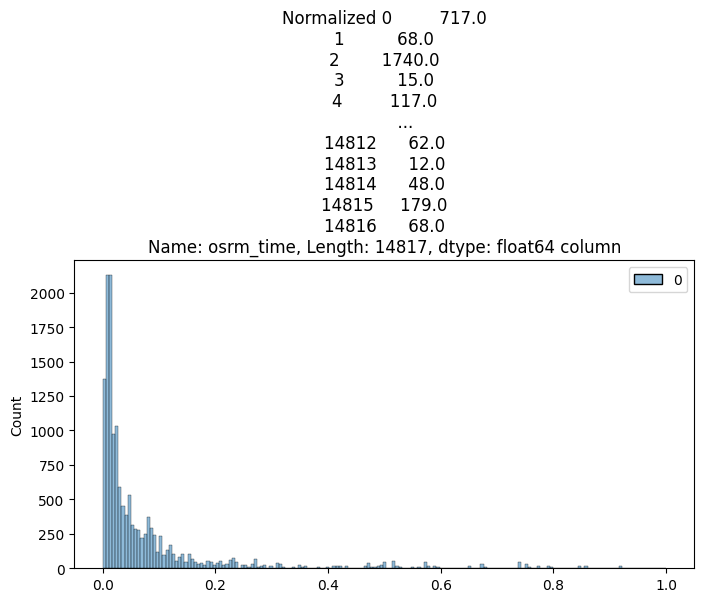

In [102]:
plt.figure(figsize = (8, 4))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['osrm_time']} column")
plt.plot()

[]

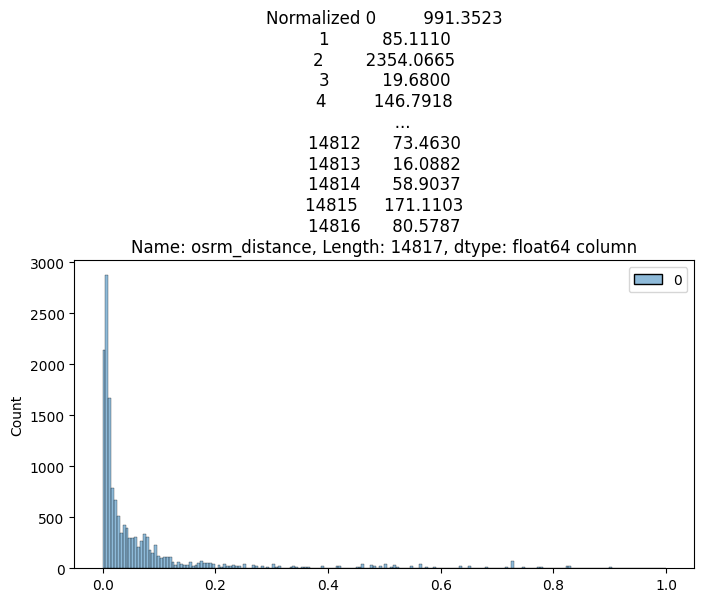

In [103]:
plt.figure(figsize = (8, 4))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['osrm_distance']} column")
plt.plot()

[]

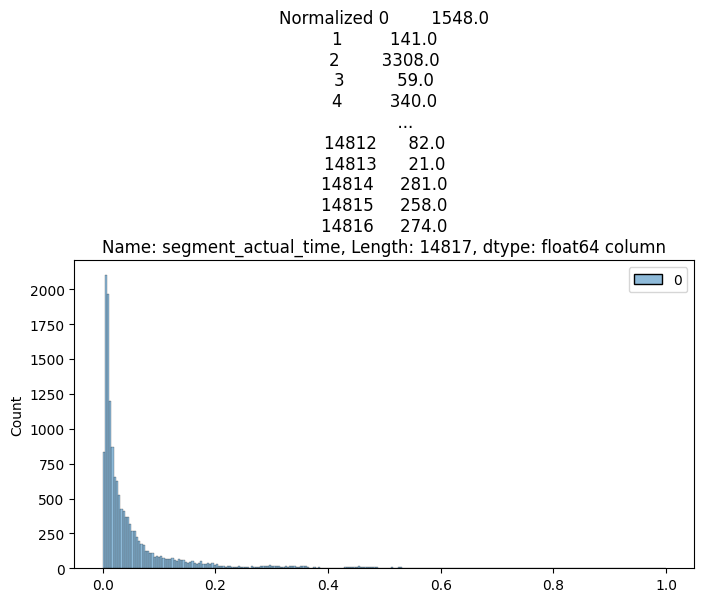

In [104]:
plt.figure(figsize = (8, 4))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['segment_actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['segment_actual_time']} column")
plt.plot()

[]

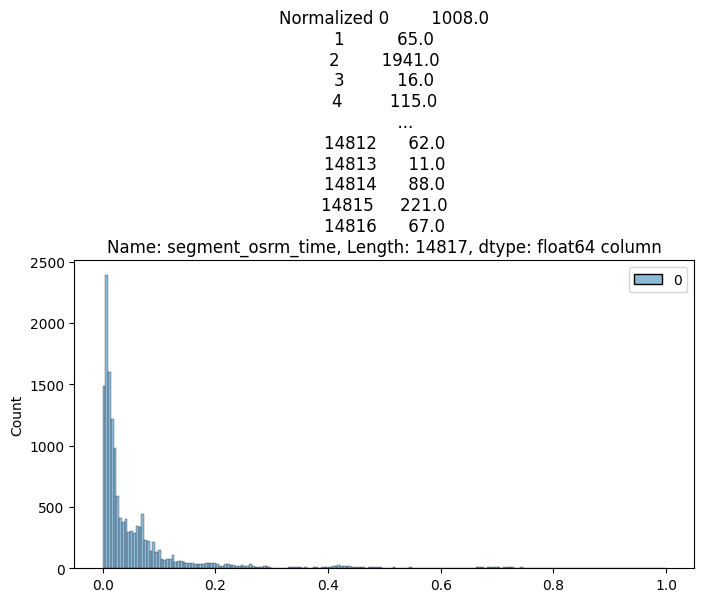

In [105]:
plt.figure(figsize = (8, 4))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['segment_osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['segment_osrm_time']} column")
plt.plot()

[]

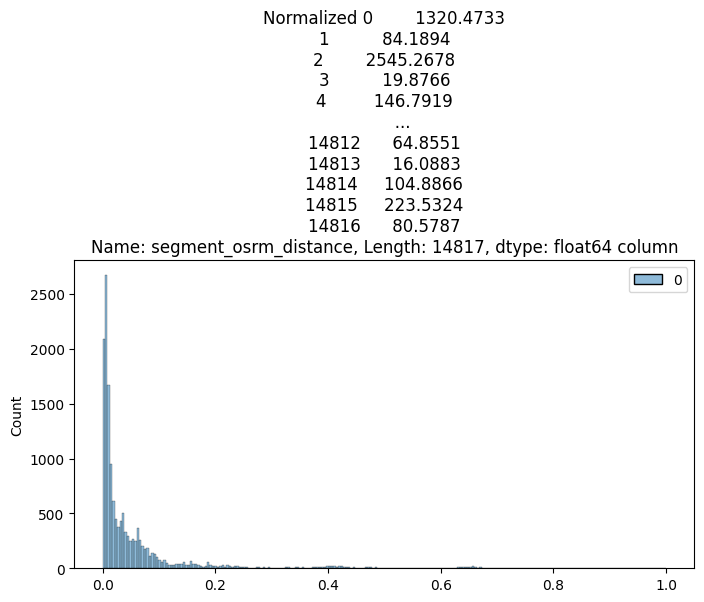

In [106]:
plt.figure(figsize = (8, 4))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['segment_osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['segment_osrm_distance']} column")
plt.plot()

### Column Standardization

In [107]:
from sklearn.preprocessing import StandardScaler

[]

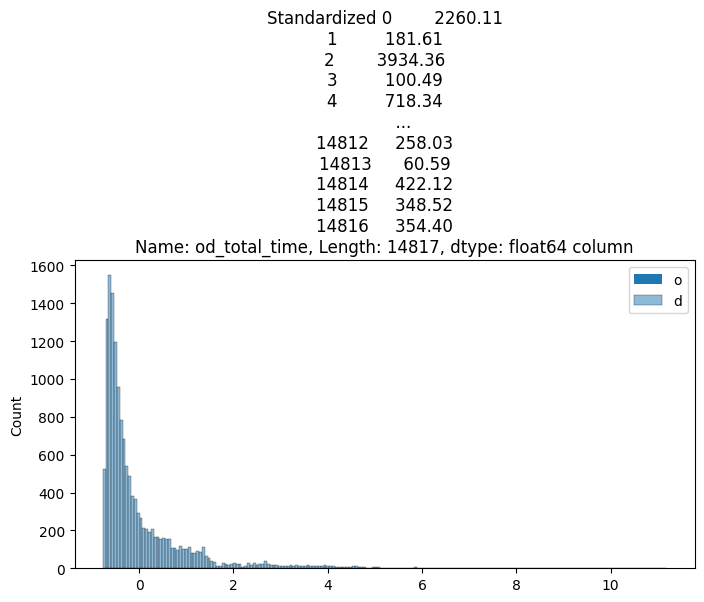

In [108]:
plt.figure(figsize = (8, 4))
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df2['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['od_total_time']} column")
plt.legend('od_total_time')
plt.plot()

[]

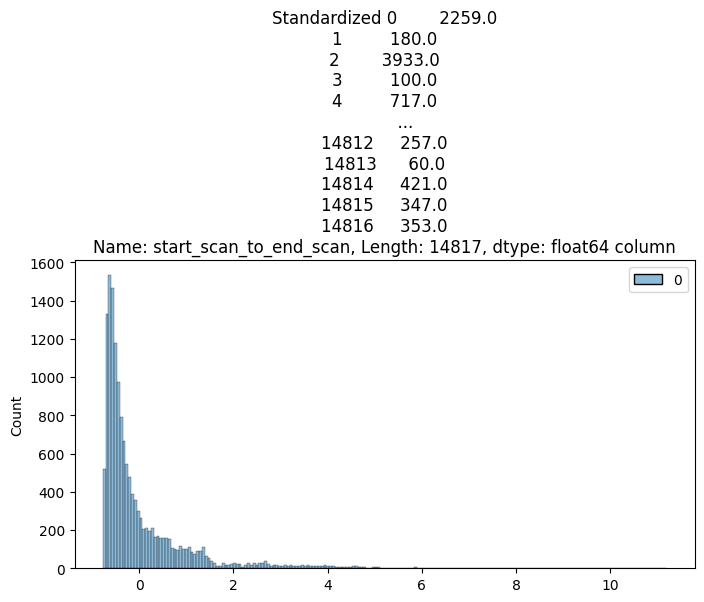

In [109]:
plt.figure(figsize = (8, 4))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['start_scan_to_end_scan']} column")
plt.plot()

[]

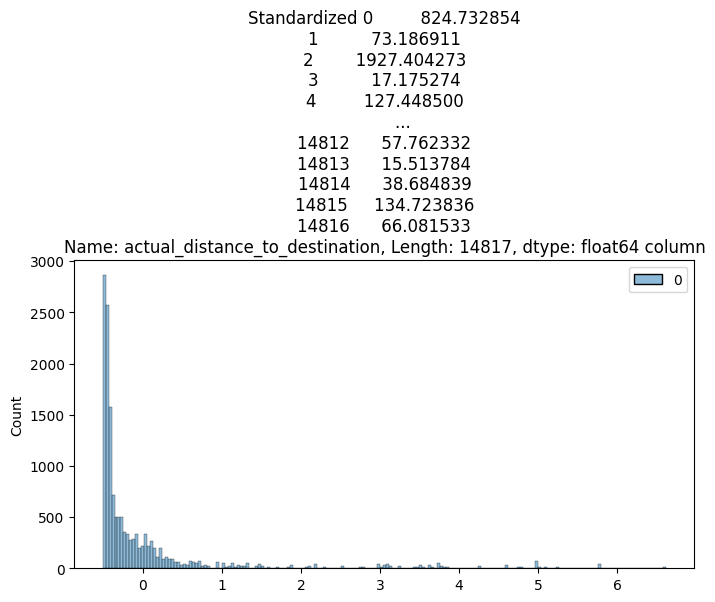

In [110]:
plt.figure(figsize = (8, 4))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['actual_distance_to_destination'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['actual_distance_to_destination']} column")
plt.plot()

[]

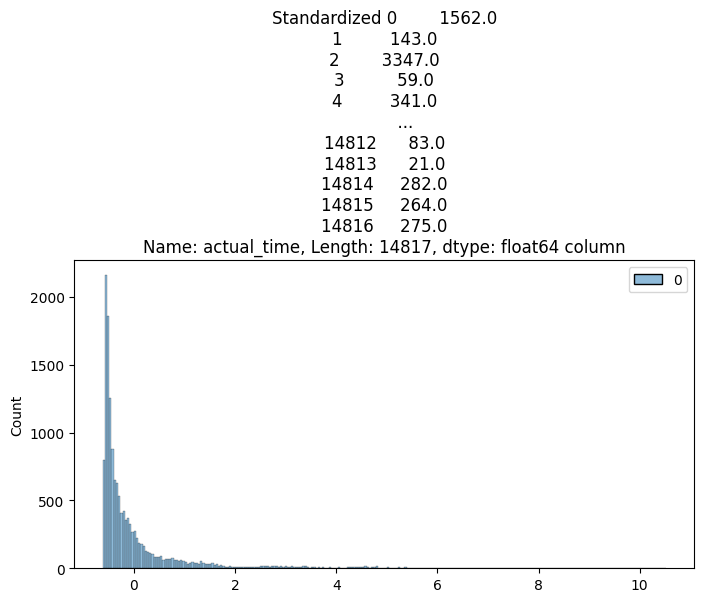

In [111]:
plt.figure(figsize = (8, 4))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['actual_time']} column")
plt.plot()

[]

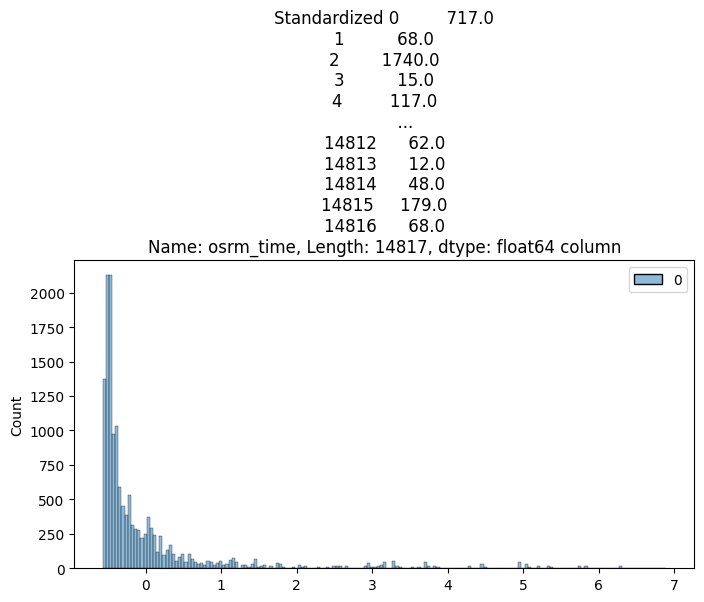

In [112]:
plt.figure(figsize = (8, 4))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['osrm_time']} column")
plt.plot()

[]

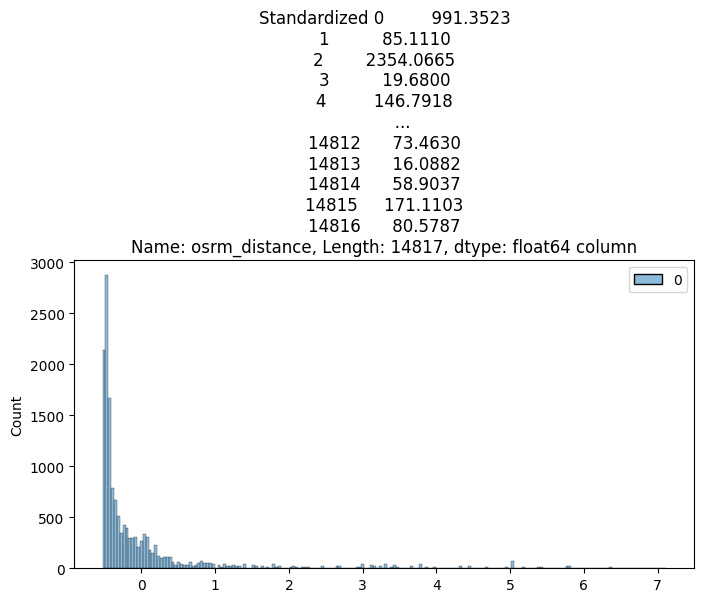

In [113]:
plt.figure(figsize = (8, 4))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['osrm_distance']} column")
plt.plot()

[]

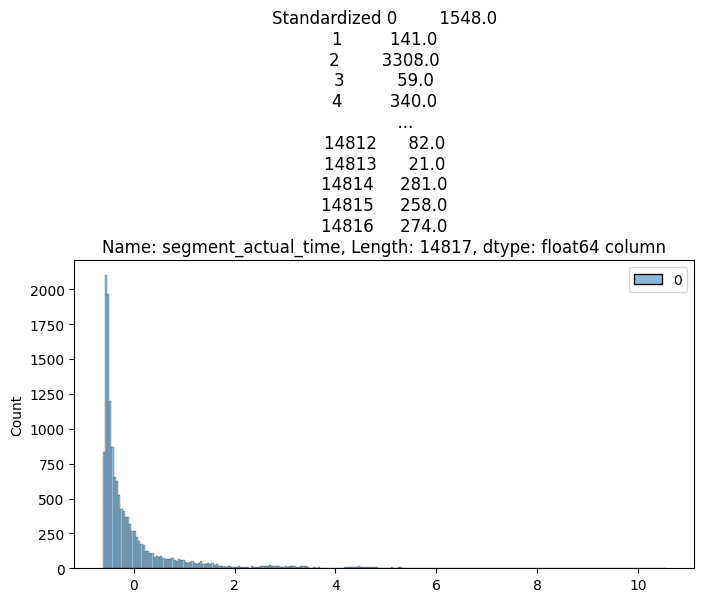

In [114]:
plt.figure(figsize = (8, 4))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['segment_actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['segment_actual_time']} column")
plt.plot()

[]

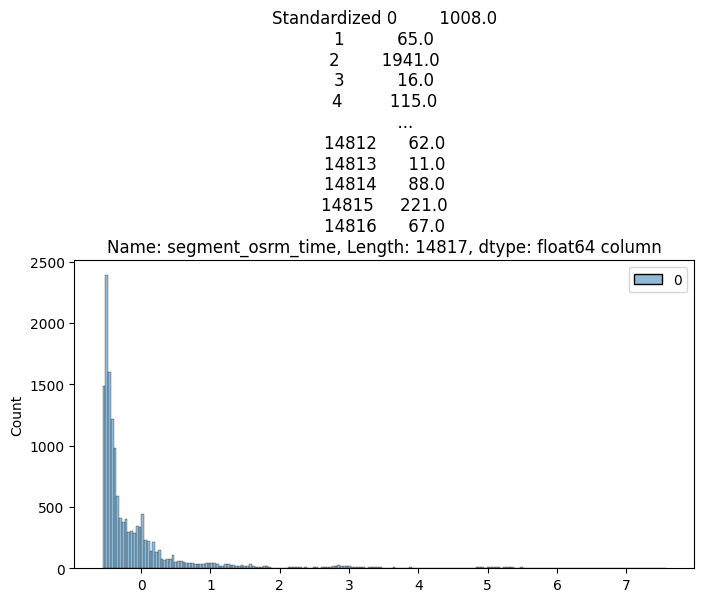

In [115]:
plt.figure(figsize = (8, 4))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['segment_osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['segment_osrm_time']} column")
plt.plot()

[]

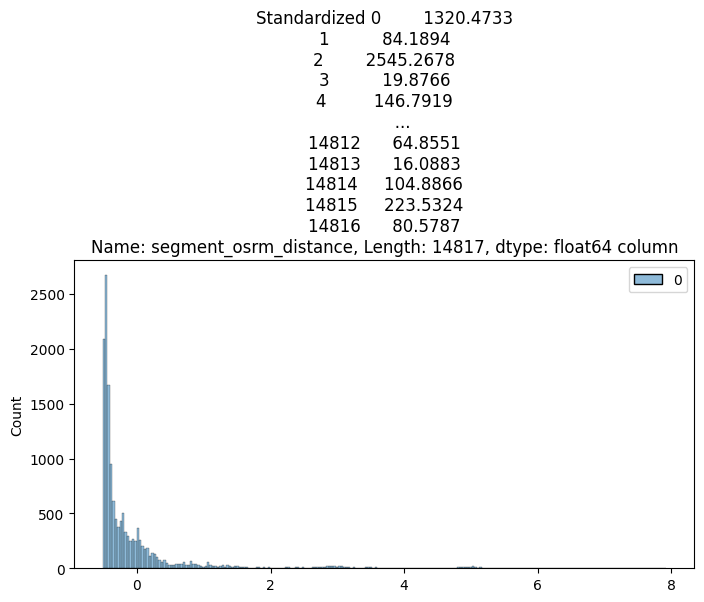

In [116]:
plt.figure(figsize = (8, 4))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['segment_osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['segment_osrm_distance']} column")
plt.plot()

Business Insights based on Non-Graphical and Visual Analysis
----------------------------------------------------------------------------------------------

There are 144867 records with 24 columns which after merging and splitting reduced to 14817 unique records and 28 columns.
There are 2 columns with null values which were replaced with unique random values.
From the statistical and categorical summary, we can observe that
1. On An Average the distance between source and destination is 164km and avg time taken is 357 mins between source            and destinations.
2. There are 938 source and 1042 destination centers serving over 850 destination places.
3. The top most orders are sourced from Maharashtra and then followed by karnataka.
4. The top most maximum number of trips originated from Mumbai city followed by Gurgaon, Delhi, Bengaluru. 
5. The top most destination state is Maharashtra and destination city is Mumbai, while the top destination place is            Bilaspur. 
From the hypothesis testing we observe that:
--------------------------------------------------
Features start_scan_to_end_scan and od_total_time(difference between od_start_time and od_end_time) are statistically similar. 

Features actual_time & osrm_time are statistically different.

Features actual_time and segment_actual_time are statistically similar.

Features osrm_distance and segment_osrm_distance are statistically different.

Features osrm_time & segment_osrm_time are statistically different.

categorical features such as 'route_type' and 'data' are encoded and represented in their binary form.


Recommendations:
------------------------------
The time estimated by OSRM (osrm_time) and the actual time taken differ. minimizing this disparity can provide customers with a more reliable expectation of when their deliveries will arrive, thereby contributing to overall convenience.

The distance calculated by the OSRM (Open Source Routing Machine) and the actual distance covered do not align. This discrepancy could stem from the delivery person deviating from the predefined route, potentially causing delays in deliveries. 
Alternatively, it might indicate inaccuracies in the OSRM device's predictions, which consider factors such as distance, traffic, and other variables.

A significant portion of orders originates from or is destined for states such as Maharashtra, Karnataka, Haryana, and Tamil Nadu. To strengthen market presence in these regions, optimization and expanding the current transportation routes are necessary.

Conducting customer profiling for individuals residing in states like Maharashtra, Karnataka, Haryana is essential. This will help to understand the reasons behind the huge volume of orders from these states and enhance the overall purchasing and delivery experience for customers.

Some regions may experience high traffic, while others may face challenging terrain conditions. Utilizing this information can serve as a valuable indicator for strategically planning and addressing increased demand.
